In [1]:
# package(s) related to time, space and id
import datetime

# Used for mathematical functions
import math
import platform
import time

import matplotlib.pyplot as plt

# Used for making the graph to visualize our problem
import networkx as nx

# package(s) for data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# spatial libraries
import pyproj
import shapely.geometry

# you need these dependencies (you can get these from anaconda)
# package(s) related to the simulation
import simpy
from simplekml import Kml, Style

# OpenTNSim
import opentnsim

In [2]:
# V=ship velocity(VOG) or deep water velocity no current velocity was taking into account
# Urel=V+Ur
# Urel= 1/1-exp(4*(1-h/T))
# Am=midship cross section
# Ac=channel cross section
# T=ship draft

In [3]:
V=3
Bc=np.any([100])
h = np.array([3, 3.5 ,4, 5.5, 7, 10])
T = np.any([2.5])
r=h/T
print(r)

#Classification of water
for i in range(len(r)):
    if r[i] > 3:
        print(r[i], "not effect on ship")
    elif r[i] <= 3 and r[i]>1.5:
        print(r[i], "visible effect on ship")
    elif r[i] <=1.5 and r[i]>1.2:
        print(r[i], "very significant effect on ships")
    else:
        print(r[i], "water motion dominates ship") 
        
# Blockage coefficient Am/Ac
Bs=11.75
Ls=135
S=Bs*Ls+2*Ls*T
print('S=',S,'m^2')
Am=Bs*T
Ac=Bc*h
Blockage=Am/Ac
for i in range(len(Blockage)):
    if Blockage[i] <= 0.1:
        print("very wide channel Urel=Veff")
    else:
        print("urel=V+Ur") 
    
# Froude number
def get_Frh ():
        return V / np.sqrt(h*9.81)   
Frh = get_Frh () 
print('Frh', Frh)

# Frh<1 subcritical dn > dcritical
# Frh>1 supercritical dn < dcritical
def subcritical_or_supercritical (Frh):
    """Check flow"""
    if  np.all(Frh)<1:
        return "subcritical" 
    if  np.all(Frh)<0.65: 
        return"desirable condition"
    if  np.all(Frh)>1: # supercritical flow 
        return "unstable"
    print(subcritical_or_supercritical)
    return
Flow_type = subcritical_or_supercritical (Frh)
print (Flow_type)

# Return flow velocity
def get_Ur ():  
    return (Blockage/(1-(Blockage)-(Frh**2)))*V
Ur = get_Ur ()
print('Ur=', Ur, 'm/s')

# Effective velocity
def get_Veff (): 
    return V/(1-np.exp(4*(1- r)))
Veff = get_Veff ()
print('Veff=', Veff, 'm/s') 

# Relative velocity
def get_Urel ():
    if np.all(Blockage) <=0.1:
        Urel= Veff
    else:
        Urel=  V + Ur
    return Urel
Urel = get_Urel ()
print('Urel=', Urel, 'm/s')

[ 3.   3.5  4.   5.5  7.  10. ]
3.0 visible effect on ship
3.5 not effect on ship
4.0 not effect on ship
5.5 not effect on ship
7.0 not effect on ship
10.0 not effect on ship
S= 1856.25 m^2
urel=V+Ur
urel=V+Ur
urel=V+Ur
urel=V+Ur
urel=V+Ur
urel=V+Ur
Frh [0.55300126 0.51197969 0.47891314 0.4084185  0.36202431 0.30289127]
<function subcritical_or_supercritical at 0x000001A09BED2A60>
None
Ur= [ -3.64626335  -3.84513385  -4.06694893  -4.91808     -6.21974909
 -13.21496131] m/s
Veff= [3.00100673 3.00013621 3.00001843 3.00000005 3.         3.        ] m/s
Urel= [ -0.64626335  -0.84513385  -1.06694893  -1.91808     -3.21974909
 -10.21496131] m/s


In [4]:
# Reynolds number computation
def RE():
    return (V*Ls)/ 10**(-6)
Re = RE ()
print ('Re=',f'{Re:.1f}')

# Reynolds number
# Laminar flow Re <2000
# Unstable flow 2000< Re <4000
# Turbulent flow Re >4000
def lam_or_unstable_or_turbul(Re):
    """Check type of flow."""
    if Re<=2000:
        return "laminar"
    if Re>=4000: 
        return "turbulent"
    else: # unstable flow
        return "unstable"
    print(lam_or_unstable_or_turbul)
    return

Flow_condition = lam_or_unstable_or_turbul(Re)
Flow_condition

#Frictional coefficient was computed based on ITTC theory & 40% of surcharge
def get_Cf ():
    Cf = 0.053/(((np.log(Re))-2)**2)
    return Cf
cf = get_Cf ()
print ('cf=',f'{cf:.6f}')

Re= 405000000.0
cf= 0.000167


In [5]:
#Frictional resistance
def get_Rf ():
    RF =  0.5 * 1000 *(Urel**2) * cf * S
    return  RF
Rf = get_Rf ()+0.4*get_Rf ()
print ( 'Rf=',Rf,'kN')

Rf= [   90.58230904   154.90852992   246.89460586   797.91709993
  2248.37318277 22630.68972774] kN


In [6]:
#Pressure resistance
def get_Rp ():
    RP = 0.5 * 1000 *(Urel**2) * 0.15 * Am
    return RP
Rp = get_Rp ()
print ( 'Rp=',Rp,'kN' )

Rp= [  368.05962437   629.43389209  1003.19738873  3242.14596864
  9135.72857531 91954.41415558] kN


In [7]:
# Water level depression
def get_z ():
    Z = (Blockage*(Frh**2)*h)/(1-Blockage-(Frh**2))
    return Z
z = get_z ()
print ('z=',z,'m')

z= [-1.11506524 -1.17588191 -1.24371527 -1.504      -1.90206394 -4.04127257] m


In [8]:
# Shallow water effect- Waterlevel depression
# Based on Schijf theory
def get_Rz ():
    RZ = 1000 *9.81 *z * 0.2 * Am
    return RZ
Rz = get_Rz ()
print ('Rz=',Rz,'kN')

Rz= [-25706.15658363 -27108.19364523 -28671.98994443 -34672.464
 -43849.23108053 -93165.4772141 ] kN


In [9]:
# Total resistance computation
def get_Rtot ():
    R = Rf + Rp + Rz
    return R
Rtot = get_Rtot ()
print ('Rtot=',Rtot,'kN')

Rtot= [-25247.51465022 -26323.85122322 -27421.89794985 -30632.40093143
 -32465.12932245  21419.62666922] kN


In [10]:
# Power estimation 
# BHP > DHP > EHP
# 1) Effective horse power Pe (Power needed to overcome the total drag)
def get_Pe ():
    PE = Urel * Rtot
    return PE
Pe = get_Pe ()
print ('Pe=',Pe,'kw')

# 2) Delivered horse power Pd (Power delivered to the propeller shaft)
def get_Pd (Pe):
    PD = Pe/ 0.55
    return PD
Pd = get_Pd (Pe)
print ('Pd=',Pd,'kw')

# 3) Brake horse power or Propulsion power Pb (Required motor power)
def get_Pb (Pe):
    PB = 2*Pe
    return PB
Pb = get_Pb (Pe)
print ('Pb=',Pb,'kw')

Pe= [  16316.54327573   22247.17774132   29257.76462921   58755.39557857
  104529.57057444 -218800.65763571] kw
Pd= [  29666.44231951   40449.41407512   53195.93568947  106827.99196103
  190053.76468081 -397819.37751947] kw
Pb= [  32633.08655146   44494.35548264   58515.52925842  117510.79115713
  209059.14114889 -437601.31527142] kw


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


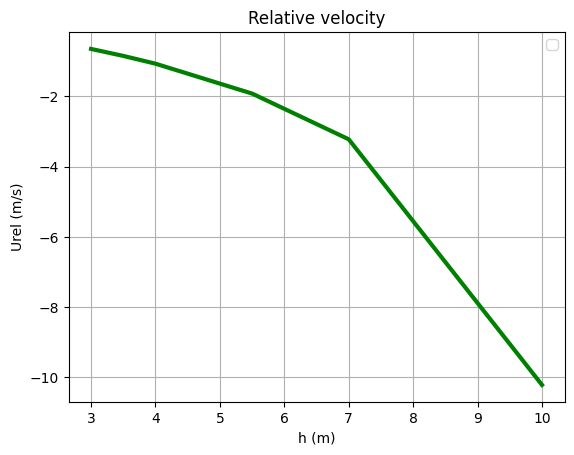

In [11]:
#Plot Urel as a function of h
plt.plot(h,Urel, 'green', linewidth = 3.0)
plt.xlabel('h (m)')
plt.ylabel('Urel (m/s)')
plt.legend()
plt.grid()
plt.title('Relative velocity');

ValueError: x and y must have same first dimension, but have shapes (200,) and (20,)

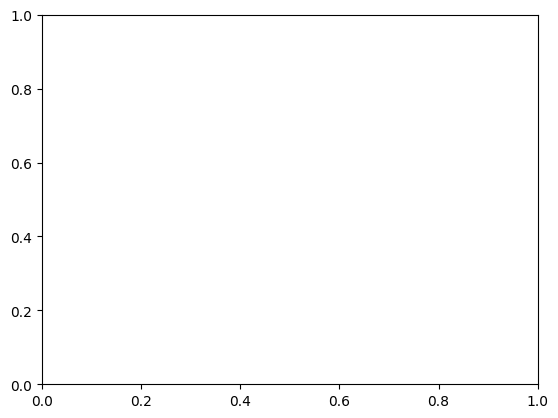

In [12]:
#Plot Rf as a function of Urel
Rf = np.linspace(0,2,200)
Urel= np.linspace(0,1,20)
plt.plot(Rf,Urel)
plt.xlabel('Urel (m/s)')
plt.ylabel('Rf (kN)')
plt.legend()
plt.title('Frictional resistance');